# Cargamos los paquetes

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Calibración de la imagen
En primer lugar necesitamos calibrar la camara mediante imagénes de prueba

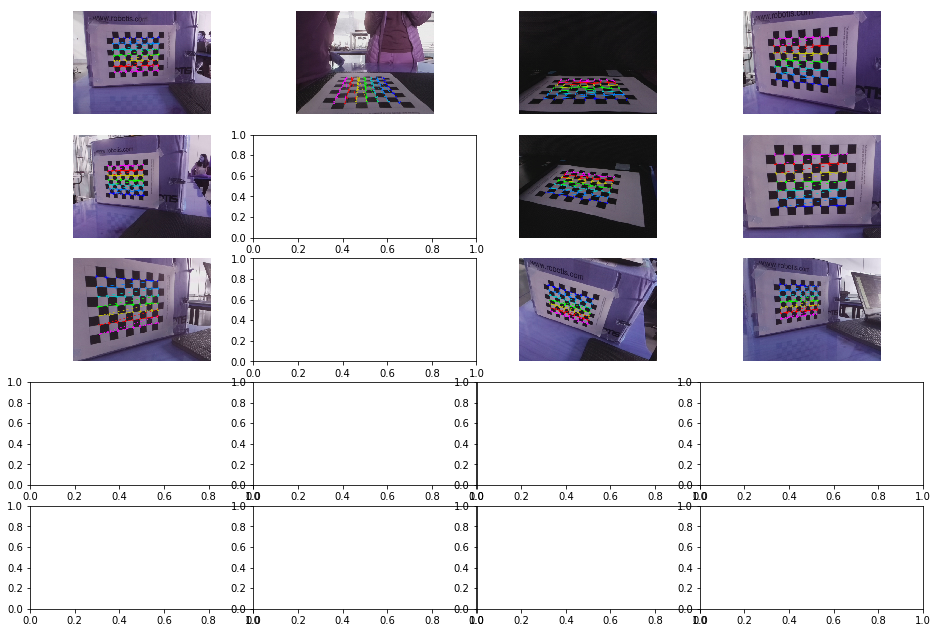

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7 * 9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:7].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('images/camera_cal/calibration*.png')

fig, axs = plt.subplots(5, 4, figsize=(16, 11))
fig.subplots_adjust(hspace=.2, wspace=.001)
axs = axs.ravel()
# Step through the list of images and search for chessboard corners in each one
for i, fname in enumerate (images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 7), None)

    # If found, add object points, image points to the lists
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9, 7), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)

In [6]:
ret, mtrz, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera Matrix")
print(mtx)
print("Distortion Coeffs")
print(dist)

Camera Matrix
[[504.35547271   0.         325.6205677 ]
 [  0.         502.24376143 243.87106666]
 [  0.           0.           1.        ]]
Distortion Coeffs
[[ 0.16847352 -0.10073367 -0.00235142  0.00098503 -0.84293621]]


## Corregimos la distorsión de la imagen

In [5]:
def sinDistorision (img, mtrz, distCoff):
    undist = cv2.undistort(img, mtrz, distCoff, None, mtrz)
    return undist

In [7]:
filename = "images/testa37.png"
img = mpimg.imread(filename)
undist = sinDistorision(img, mtrz, dist)

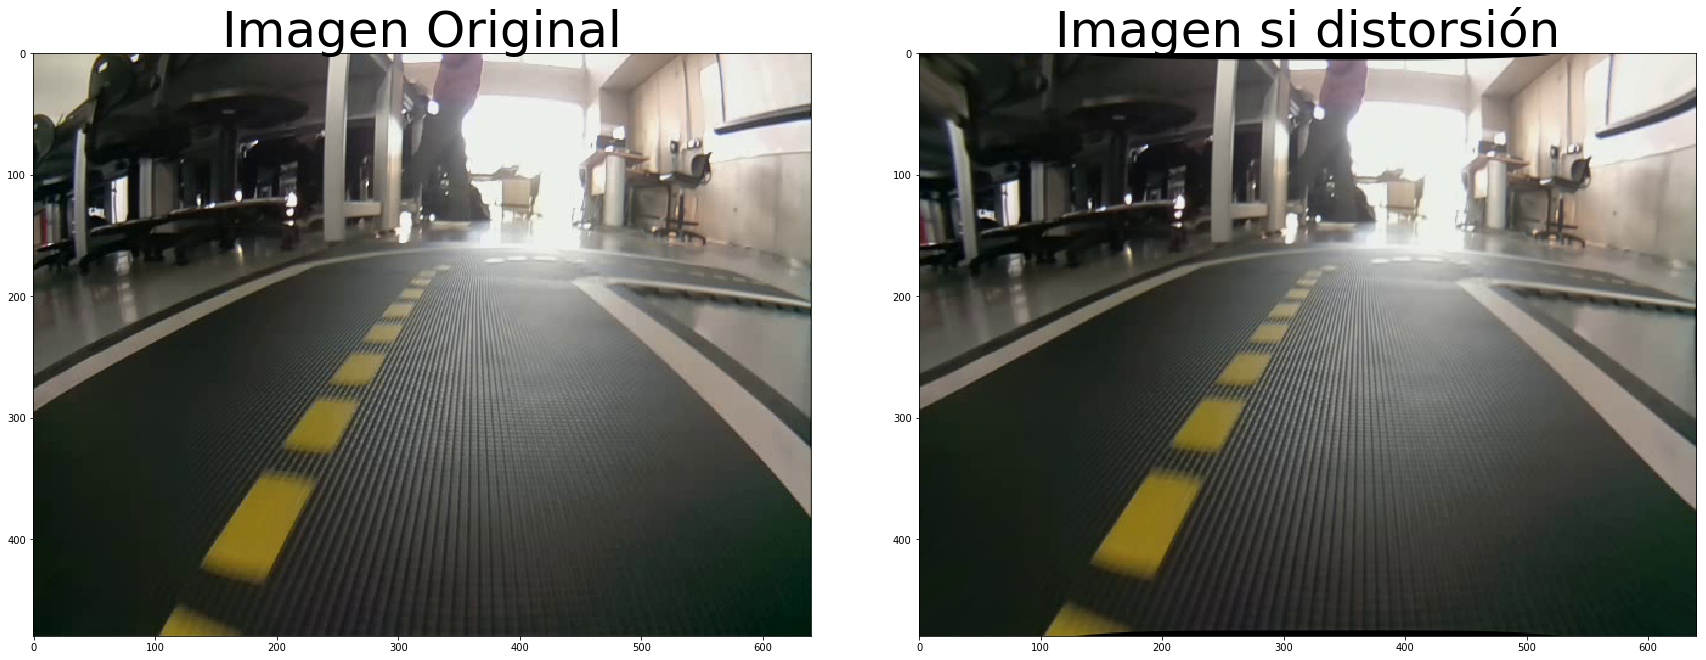

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Imagen Original', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Imagen si distorsión', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Vista Aerea

In [26]:
def drawPoints (img, src):
    result = np.copy(img)
    color = [0, 0, 255] # Celeste
    espesor = -1
    radio = 5
    x0, y0 = src[0]
    x1, y1 = src[1]
    x2, y2 = src[2]
    x3, y3 = src[3]
#    x4, y4 = src[4]
    cv2.circle(result, (x0, y0), radio, color, espesor)
    cv2.circle(result, (x1, y1), radio, color, espesor)
    cv2.circle(result, (x2, y2), radio, color, espesor)
    cv2.circle(result, (x3, y3), radio, color, espesor)
#    cv2.circle(result, (x4, y4), radio, color, espesor)
    return result

def drawLines (img, src):
    result = np.copy(img)
    color = [0, 0, 255] # Celeste
    espesor = 2
    x0, y0 = src[0]
    x1, y1 = src[1]
    x2, y2 = src[2]
    x3, y3 = src[3]
#    x4, y4 = src[4]
    cv2.line(result, (x0, y0), (x1, y1), color, espesor)
    cv2.line(result, (x1, y1), (x2, y2), color, espesor)
    cv2.line(result, (x2, y2), (x3, y3), color, espesor)
    cv2.line(result, (x3, y3), (x0, y0), color, espesor)
#    cv2.line(result, (x4, y4), (x0, y0), color, espesor)
    return result


In [22]:
w = 640
# Puntos de la imagen inicial
src = np.float32([
    [30, 480],
    [295, 173],
    [479, 190],
    [640, 320]
    #[640, 480]
])
# Puntos de la nueva imagen
dst = np.float32([
    [180, 480],
    [180, 0],
    [w - 180, 0],
    #[w - 180, 215],
    [w - 180, 480]
])
def deformado(img):
    #Transformacion perspectiva
    img_size = (img.shape[1], img.shape[0])
    trans = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, trans, img_size, flags=cv2.INTER_NEAREST)
    return warped


def noDeformado(img):
    #Transformación inversa
    img_size = (img.shape[1], img.shape[0])
    trans = cv2.getPerspectiveTransform(dst, src)
    unwarped = cv2.warpPerspective(img, trans, img_size, flags=cv2.INTER_NEAREST)
    return unwarped

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


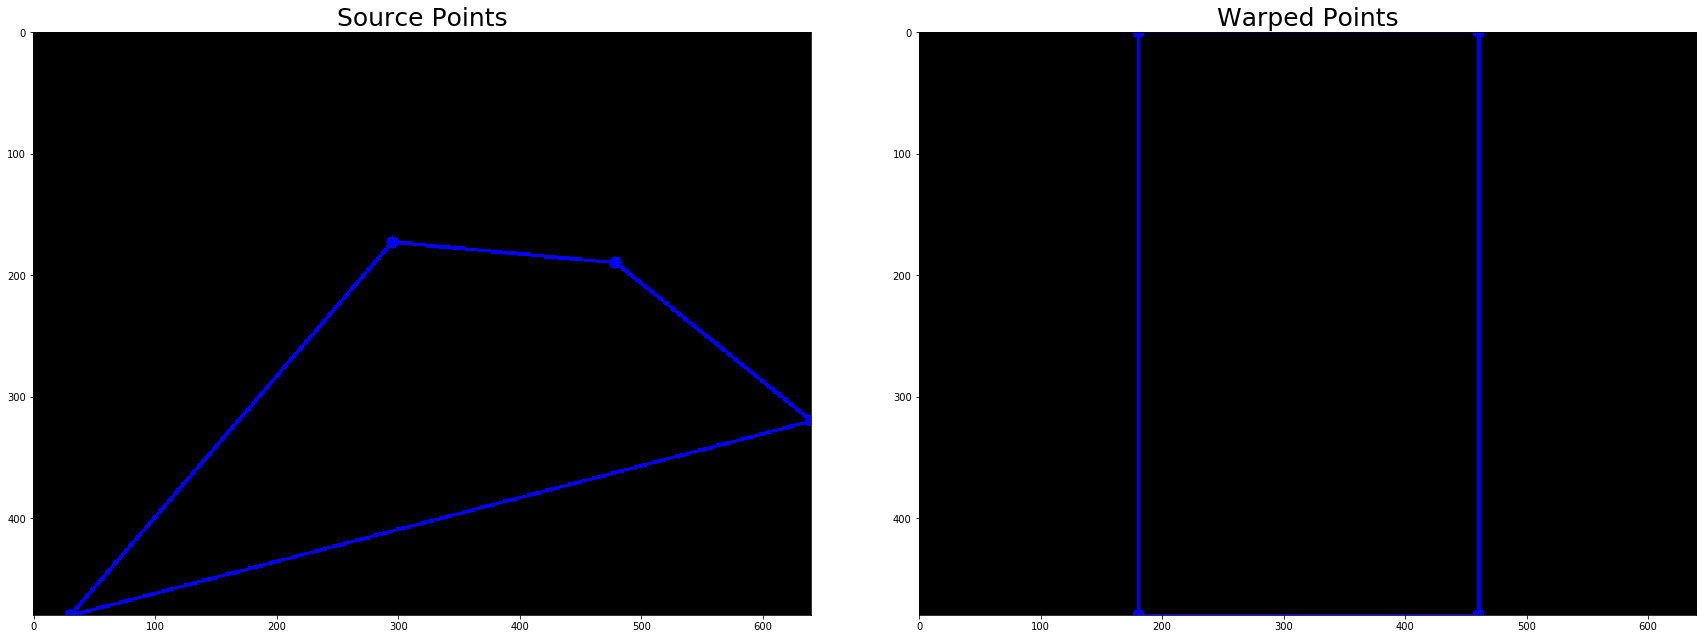

In [27]:
imgSrc = np.zeros_like(deformado(img))
imgDst = np.zeros_like(deformado(img))

# Dibujar los puntos del area seleccionada
src_points_img = drawPoints(imgSrc, src)
src_points_img = drawLines(src_points_img, src)
dst_points_warped = drawPoints(imgDst, dst)
dst_points_warped = drawLines(dst_points_warped, dst)

### Mostrar la imagen
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(src_points_img)
ax1.set_title('Source Points', fontsize=25)
ax2.imshow(dst_points_warped)
ax2.set_title('Warped Points', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

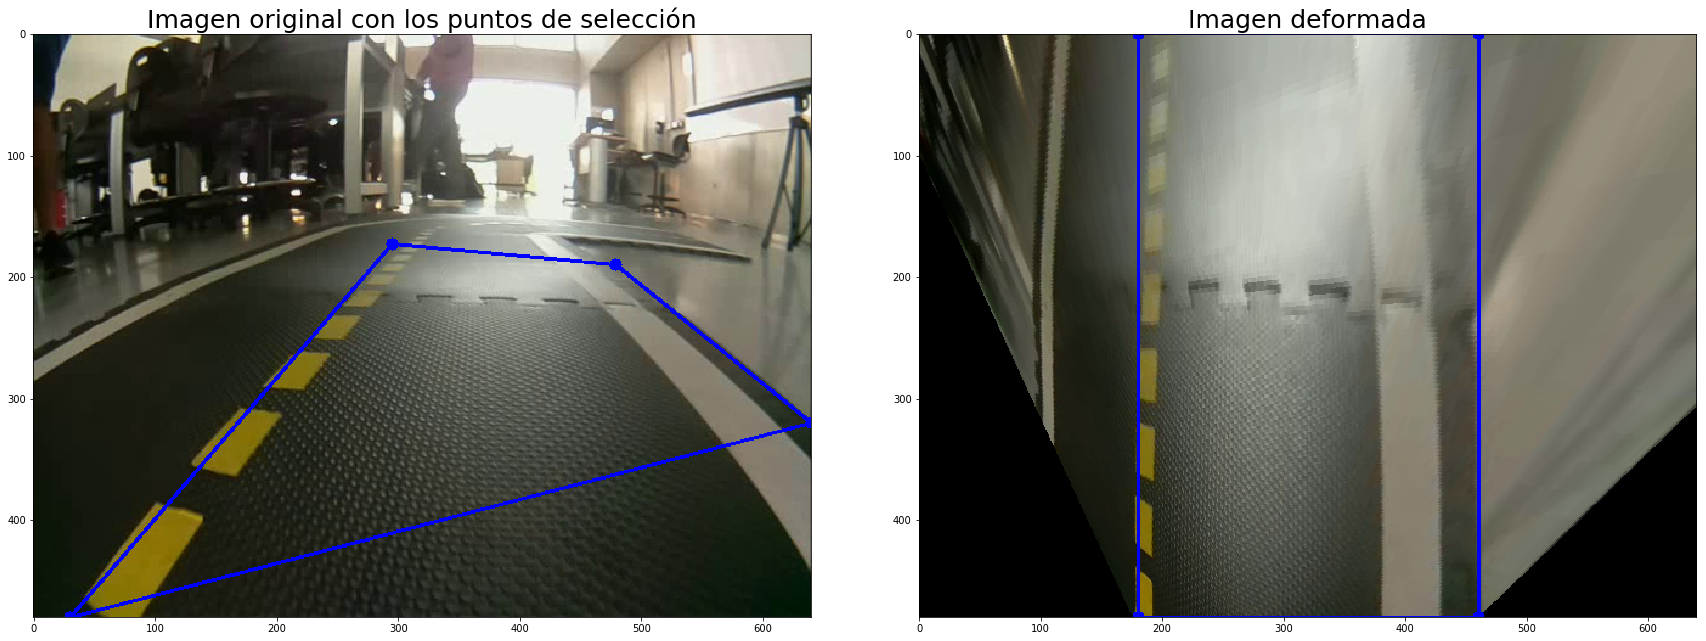

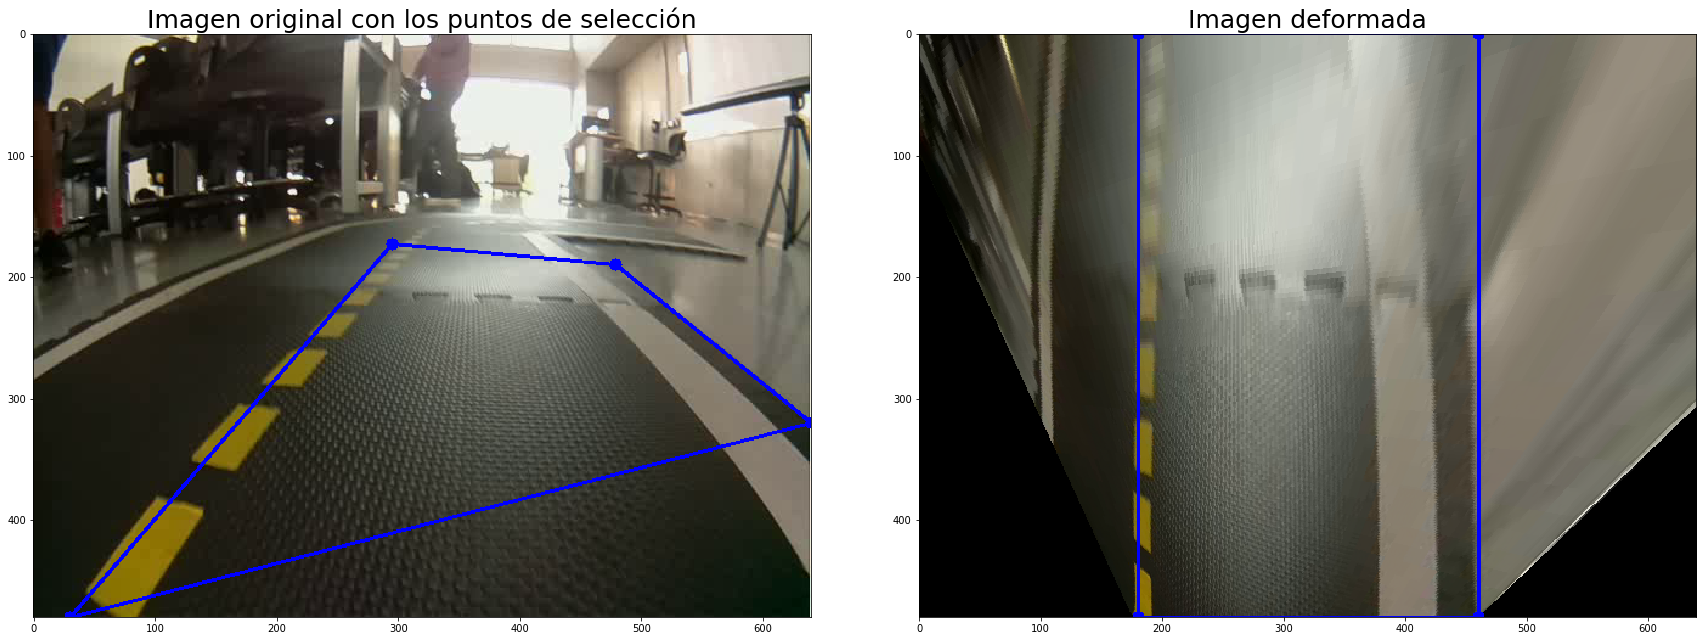

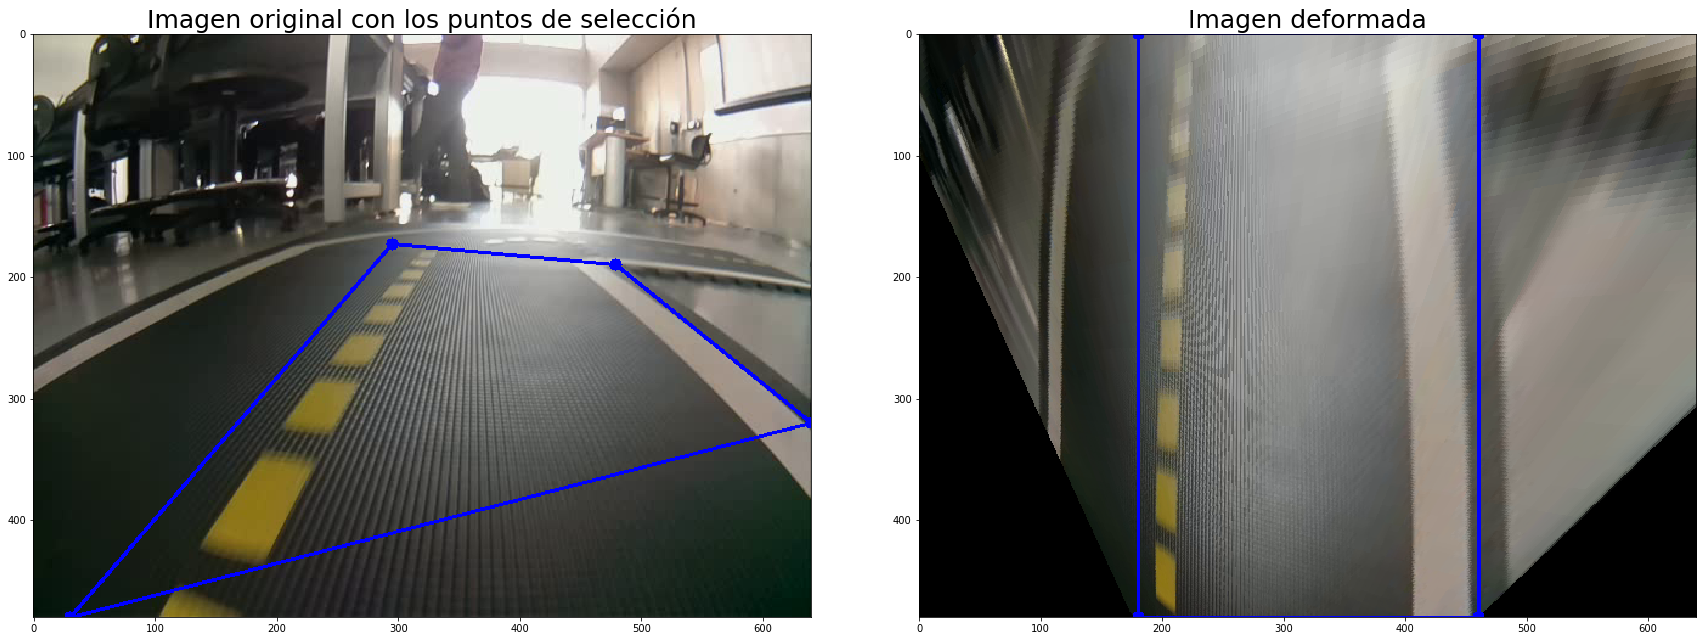

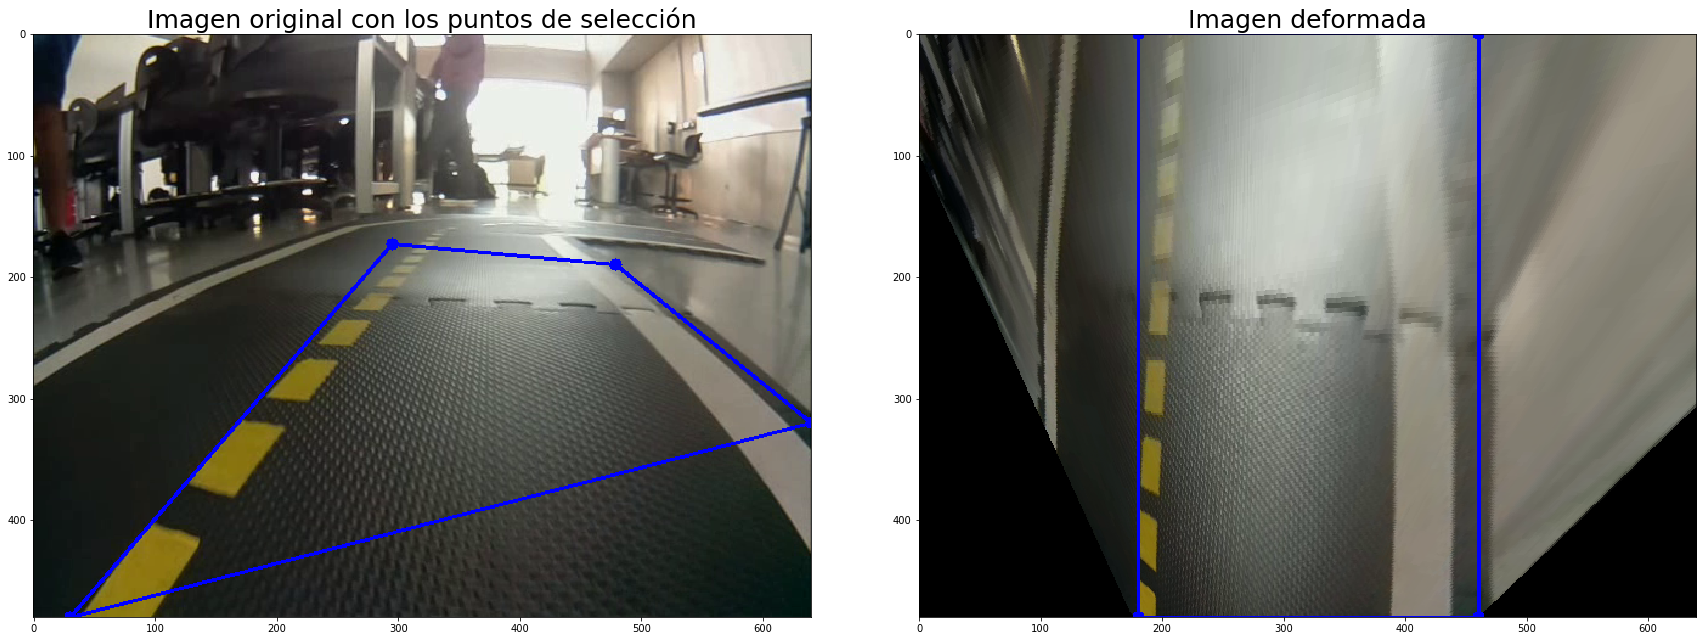

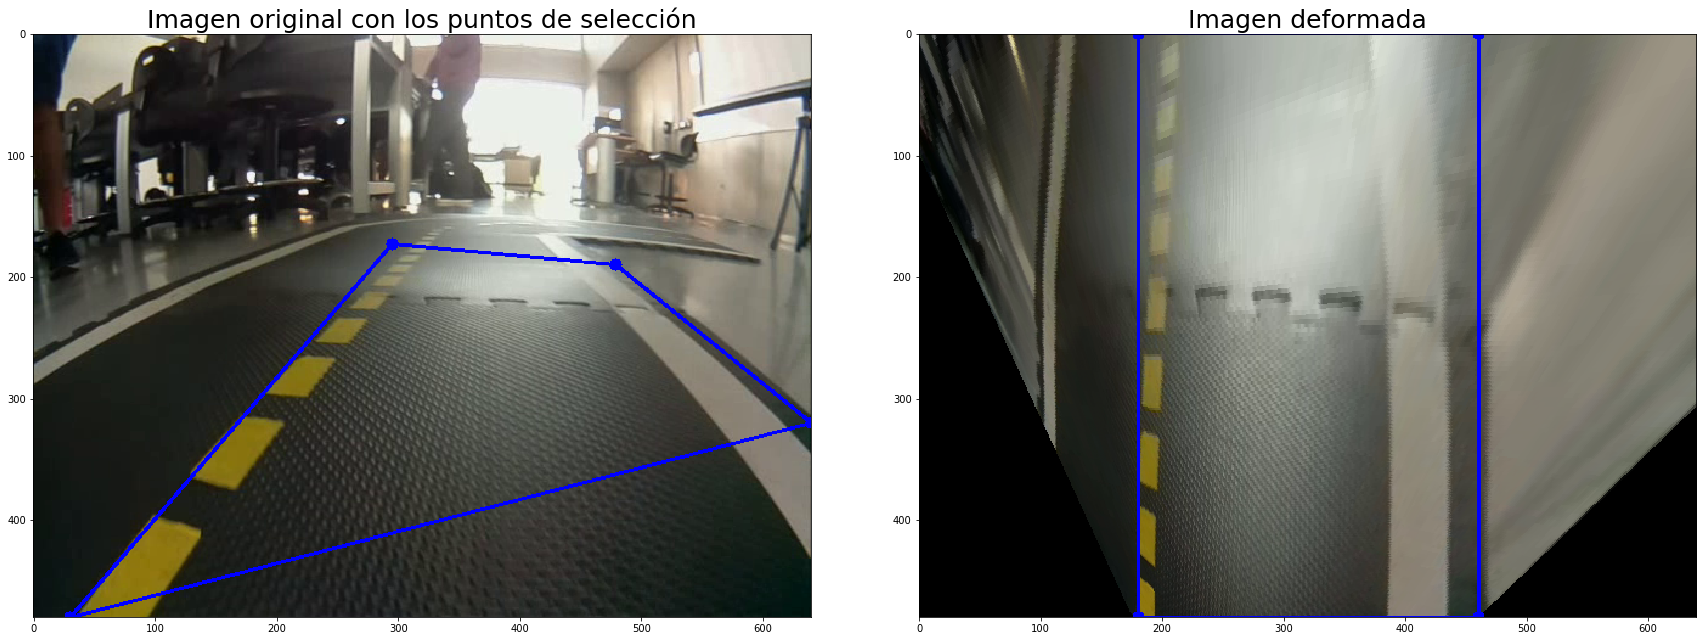

In [28]:
images = glob.glob('images/testa*.png')

for fname in images:
    img = mpimg.imread(fname)

    # Quitar la distorsión
    undist = sinDistorision(img, mtrz, dist)

    # Deformar
    warped = deformado(undist)

    # Añadir los puntos a la imagen
    src_points_img = drawPoints(img, src)
    src_points_img = drawLines(src_points_img, src)
    dst_points_warped = drawPoints(warped, dst)
    dst_points_warped = drawLines(dst_points_warped, dst)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(src_points_img)
    ax1.set_title('Imagen original con los puntos de selección', fontsize=25)
    ax2.imshow(dst_points_warped)
    ax2.set_title('Imagen deformada', fontsize=25)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Selección del color

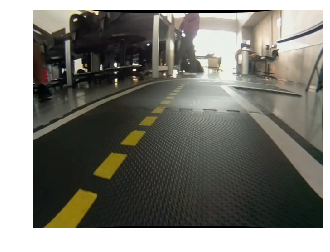

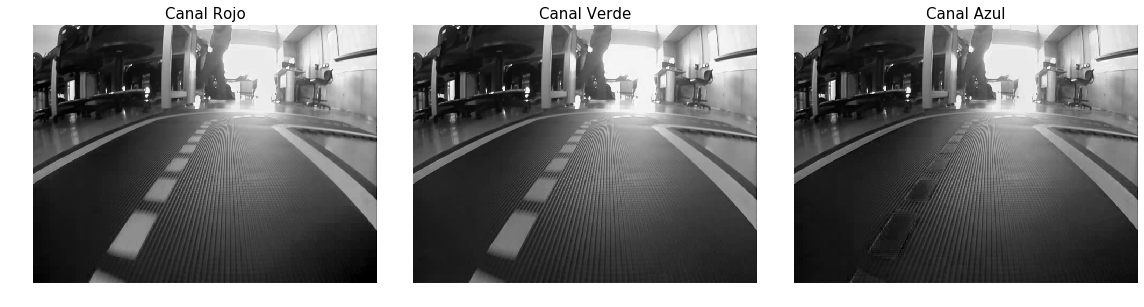

In [46]:
plt.imshow(undist)
plt.axis('off')

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16, 12)) #
# Plot RGB
ax1.imshow(R, cmap='gray')
ax1.set_title('Canal Rojo', fontsize=15)
ax1.axis('off')
ax2.imshow(G, cmap='gray')
ax2.set_title('Canal Verde', fontsize=15)
ax2.axis('off')
ax3.imshow(B, cmap='gray')
ax3.set_title('Canal Azul', fontsize=15)
ax3.axis('off')

plt.tight_layout()

In [47]:
### get the test images from the test_images folder
images = glob.glob('./test_images/test*.jpg')

### Loop through each image and send it to the pipeline
for fname in images:
    
    img = mpimg.imread(fname)
    # Undistort the image based on the camera calibration
    undist = undistort(img, mtx, dist)
    # warp the image
    warped = warper(undist)

    # Separate the RGB
    R = warped[:,:,0]
    G = warped[:,:,1]
    B = warped[:,:,2]

    # Convert to HLS color space
    hls = cv2.cvtColor(warped, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel_hls = hls[:,:,0]
    l_channel_hls = hls[:,:,1]
    s_channel_hls = hls[:,:,2]

    # Convert to HSV color space
    hsv = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV).astype(np.float)
    h_channel_hsv = hsv[:,:,0]
    s_channel_hsv = hsv[:,:,1]
    v_channel_hsv = hsv[:,:,2]

    # Convert to LAB color space
    lab = cv2.cvtColor(warped, cv2.COLOR_RGB2Lab).astype(np.float)
    l_channel_lab = lab[:,:,0]
    a_channel_lab = lab[:,:,1]
    b_channel_lab = lab[:,:,2]
    
    # Convert to LUV color space
    luv = cv2.cvtColor(warped, cv2.COLOR_RGB2Luv).astype(np.float)
    l_channel_luv = luv[:,:,0]
    u_channel_luv = luv[:,:,1]
    v_channel_luv = luv[:,:,2]

    
    ### Plot the source points on the original image and the warped image
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 7))
    f.suptitle(fname, fontsize=20)

    ax1.imshow(warped)
    ax1.set_title('warped original', fontsize=15)
    ax1.axis('off')
    
    ax3.imshow(s_channel_hls, cmap='gray')
    ax3.set_title('s_channel_hls', fontsize=15)
    ax3.axis('off')

    ax2.imshow(R, cmap='gray')
    ax2.set_title('red', fontsize=15)
    ax2.axis('off')

    ax4.imshow(b_channel_lab, cmap='gray')
    ax4.set_title('b_channel_lab', fontsize=15)
    ax4.axis('off')
    
    ax5.imshow(l_channel_luv, cmap='gray')
    ax5.axis('off')
    ax5.set_title('l_channel_luv', fontsize=15)
    
    ax6.imshow(v_channel_hsv, cmap='gray')
    ax6.axis('off')
    ax6.set_title('v_channel_hsv', fontsize=15)

    
    plt.subplots_adjust(hspace = .2, wspace=.001)